In [1]:
pip install deap 

Note: you may need to restart the kernel to use updated packages.


## `Import the necessary libraries`

In [30]:
from deap import base, creator, tools, algorithms
import random
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import jaccard_score
from deap import creator, base, tools, algorithms
import time
from datetime import timedelta
import matplotlib.pyplot as plt

## `Import the dataset`

In [3]:
# Load the dataset
df = pd.read_csv("books.csv")

### Data dictionary

1. **bookID**: Unique identifier for each book.
2. **title**: Title of the book.
3. **authors**: Authors of the book.
4. **average_rating**: Average rating of the book.
5. **isbn**: International Standard Book Number (ISBN) of the book.
6. **isbn13**: 13-digit ISBN of the book.
7. **language_code**: Language code of the book.
8. **num_pages**: Number of pages in the book.
9. **ratings_count**: Total number of ratings for the book.
10. **text_reviews_count**: Total number of text reviews for the book.
11. **publication_date**: Date of publication of the book.
12. **publisher**: Publisher of the book.
13. **language_encoded**: Encoded language code for the book.

In [4]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed: 12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,0439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,0439358078,9.78044E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9.78044E+12,eng,352,6333,244,11/1/2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,0439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7     num_pages         11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
 12  Unnamed: 12         4 non-null      object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


## `Data Cleaning`

In [6]:
def clean_average_rating(value):
    # Remove non-numeric characters
    cleaned_value = re.sub(r'[^0-9.]', '', str(value))

    # Handle special cases where cleaned_value is empty or contains only '.'
    if cleaned_value and cleaned_value != '..' and cleaned_value != '.':
        return int(float(cleaned_value))
    else:
        return None


# Apply the cleaning function to the average rating column
df['average_rating'] = df['average_rating'].apply(clean_average_rating)

In [7]:
df.rename({'  num_pages': 'num_pages'}, inplace = True, axis = 1)#rename columns

In [8]:
def clean_average_rating(value):
    # Remove non-numeric characters
    cleaned_value = re.sub(r'[^0-9.]', '', str(value))

    # Handle special cases where cleaned_value is empty or contains only '.' or '..'
    if cleaned_value and cleaned_value != '.' and cleaned_value != '..':
        return int(float(cleaned_value))
    else:
        return None

# Apply the cleaning function to the 'num_pages' column
df['num_pages'] = df['num_pages'].apply(clean_average_rating)

# Convert the cleaned values to integers
df['num_pages'] = df['num_pages'].astype(float).astype('Int64')

In [9]:
df.drop('Unnamed: 12', axis = 1, inplace = True) #drop unnecessary columns

In [10]:
df['average_rating'] = df['average_rating'].fillna(0) #fill null values with zero

In [11]:
df['num_pages'] = df['num_pages'].fillna(0) #fill null values with zero

In [12]:
df['average_rating'].isna().sum() #sum up all null values

0

In [13]:
df['num_pages'].isna().sum() #sum up all null values

0

In [14]:
df.info() #Check the structure of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  object 
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  Int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: Int64(1), float64(1), int64(3), object(7)
memory usage: 1.0+ MB


## `Research Objectives`



## `Feature Engineering`

In [15]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['language_encoded'] = label_encoder.fit_transform(df['language_code'])

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['average_rating', 'ratings_count', 'text_reviews_count']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Define Chromosome Representation
chromosome_length = len(df)  # Each book will be represented by its unique ID

# Display the chromosome length
print("Chromosome Length:", chromosome_length)

Chromosome Length: 11127


# Genetic Algorithm

### Target User Data
The target user data $T$ encapsulates the preferences of the user and is used as a benchmark to evaluate the fitness of the recommendations generated by the GA. The target data is represented as a set comprising average attributes of books sampled from the dataset:

$$
T = \{T_{\text{authors}}, T_{\text{avg_rating}}, T_{\text{lang_code}}, T_{\text{num_pages}}\}
$$
where $T_{\text{authors}}$ is a set of authors, indicating the user's preferred writers. $T_{\text{avg_rating}}$ is a numeric value representing the average book rating that the user tends to favor. $T_{\text{lang_code}}$ is the most common language code among the user's preferred books. Lastly, $T_{\text{num_pages}}$ reflects the average number of pages, which aligns with the user's typical book length preference.

### Individual Representation
An individual within the GA population symbolizes a potential solution to the recommendation problem, represented as a vector of book IDs, $I$:
$$
I = \{ id_1, id_2, \ldots, id_n \}
$$
Each ID corresponds to a specific book in the dataset, and $n$ denotes the size of the individual, indicating the number of book recommendations to be made.

### Fitness Evaluation
The fitness function $F$ is a composite measure that evaluates how closely an individual—i.e., a set of recommended books—matches the target user's data:
$$
F(I) = \frac{1}{4}(J + (1 - A) + L + (1 - N))
$$
The function aims to maximize the overall similarity score by evaluating various aspects of the books, such as their authors, average ratings, language, and length.

### Similarity Metrics

#### Jaccard Similarity
Jaccard similarity is a well-known metric used to compare the similarity and diversity of sample sets. Here, it measures the overlap between the authors in the user's target data and those in the individual's recommended books:
$$
J(A, B) = \frac{|A \cap B|}{|A \cup B|}
$$

#### Average Rating Similarity
This metric assesses how the average rating of the recommended books compares with the user's average book rating preference:
$$
A(I) = 1 - \frac{ | R(I) - T_{\text{avg_rating}} | }{ T_{\text{avg_rating}} }
$$
The difference is subtracted from 1 to ensure that a higher score indicates a better match.

#### Language Code Similarity
This binary metric checks if the recommended books' languages match the user's most common language preference:
$$
L(I) =
\begin{cases}
1 & \text{if } T_{\text{lang_code}} \in L(I), \\
0 & \text{otherwise}.
\end{cases}
$$

#### Number of Pages Similarity
Similar to average rating similarity, this metric evaluates how closely the length of the books (in terms of number of pages) aligns with the user's preference:
$$
N(I) = 1 - \frac{ | P(I) - T_{\text{num_pages}} | }{ T_{\text{num_pages}} }
$$

### Genetic Algorithm Process
The GA iteratively evolves a population of potential book recommendation sets over multiple generations. The process consists of initialization, where a random population of individuals is created, followed by an iterative loop of evaluation, selection, crossover, and mutation to evolve the population towards better solutions. The algorithm concludes either after a fixed number of generations or when a satisfactory fitness level is reached. The Hall of Fame ($\text{hof}$) archives the best-performing individual from the entire run.

In [35]:
target_books = df.sample(n=5500)
target_user_data = {
    "authors": set(target_books["authors"].tolist()),
    "average_rating": target_books["average_rating"].mean(),
    "language_code": target_books["language_code"].mode().iloc[0],
    "num_pages": target_books["num_pages"].mean()
}

In [36]:
# Correction: Define the Jaccard similarity for sets
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union else 0

# Correction in evaluate function to compute Jaccard similarity and other comparisons
def evaluate(individual):
    book_ids = individual
    recommended_books_data = df[df['bookID'].isin(book_ids)]

    if recommended_books_data.empty:
        return 0,

    target_authors_set = target_user_data['authors']
    recommended_authors_set = set(recommended_books_data['authors'].tolist())
    authors_jaccard = jaccard_similarity(target_authors_set, recommended_authors_set)

    average_rating_similarity = abs(recommended_books_data['average_rating'].mean() - target_user_data['average_rating']) / target_user_data['average_rating']
    language_similarity = 1 if target_user_data['language_code'] in recommended_books_data['language_code'].values else 0
    num_pages_similarity = abs(recommended_books_data['num_pages'].mean() - target_user_data['num_pages']) / target_user_data['num_pages']

    fitness = (authors_jaccard + (1 - average_rating_similarity) + language_similarity + (1 - num_pages_similarity)) / 4
    return fitness,


In [37]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_item", random.choice, df['bookID'].unique())
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_item, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=len(df['bookID'].unique()), indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)


C:\Users\PC\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\PC\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg    	std    	min    	max    
0  	5500  	5.83447	3.87359	1.28484	27.7944
1  	4111  	8.21229	4.57184	0.73706	31.4631
2  	4191  	10.3923	5.15855	0.766558	38.9191
3  	4119  	12.5784	5.90658	0.76811 	50.0813
4  	4174  	14.8402	6.82324	0.704502	58.4358
5  	4175  	17.4852	8.39792	0.754647	61.204 
6  	4117  	21.4008	9.96447	0.706262	62.0161
7  	4165  	28.2115	11.1081	0.77054 	68.7049
8  	4158  	36.9904	11.1097	0.781708	84.7583
9  	4090  	45.832 	11.0347	6.00907 	95.6705
10 	4162  	54.8681	11.7182	5.92508 	106.921
11 	4126  	64.5074	12.2621	16.593  	121.94 
12 	4167  	74.5155	12.9288	21.2691 	128.266
13 	4188  	85.2762	13.0047	41.4418 	128.266
14 	4170  	95.8873	12.7043	43.13   	128.266
15 	4172  	105.981	11.5134	53.8155 	128.266
16 	4200  	115.187	10.056 	67.7953 	128.27 
17 	4184  	122.718	7.60011	60.0186 	128.27 
18 	4208  	127.026	4.08501	90.967  	128.27 
19 	4178  	127.702	3.40084	72.3512 	128.27 
20 	4270  	127.748	3.20253	76.1498 	128.27 
21 	4184  	127.787	3.21551	84.7284 

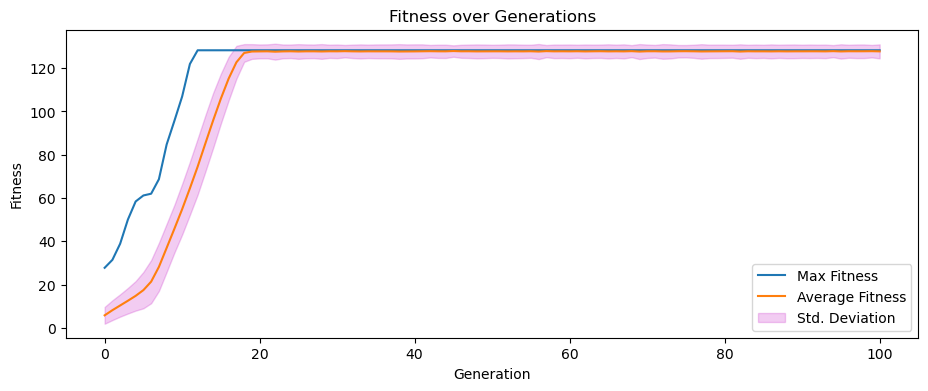

In [38]:
def main():
    random.seed(5500)
    population = toolbox.population(n=5500)
    hof = tools.HallOfFame(1)

    # Prepare containers for metrics
    max_fitness_values = []
    mean_fitness_values = []
    std_dev_fitness_values = []

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # Execute the genetic algorithm
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=100,
                                              stats=stats, halloffame=hof, verbose=True)

    # Extracting performance data
    max_fitness_values = logbook.select("max")
    mean_fitness_values = logbook.select("avg")
    std_dev_fitness_values = logbook.select("std")

    return population, logbook, hof, max_fitness_values, mean_fitness_values, std_dev_fitness_values


if __name__ == "__main__":
    start_time = time.time()
    population, logbook, hof, max_fitness, mean_fitness, std_dev_fitness = main()
    end_time = time.time()

    print(f"Elapsed time: {end_time - start_time:.2f} seconds")

    # Plotting the results
    plt.figure(figsize=(11, 4))
    generations = range(len(max_fitness))
    plt.plot(generations, max_fitness, label="Max Fitness")
    plt.plot(generations, mean_fitness, label="Average Fitness")
    plt.fill_between(generations, np.subtract(mean_fitness, std_dev_fitness),
                     np.add(mean_fitness, std_dev_fitness), color="m", alpha=0.2, label="Std. Deviation")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness over Generations")
    plt.legend()
    plt.show();

In [39]:
target_books

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,language_encoded
10884,44513,The Roald Dahl Omnibus: Perfect Bedtime Storie...,Roald Dahl,1.046830,0880291230,9.78088E+12,eng,681,-0.139236,-0.144354,6/13/1993,Barnes & Noble,9
4444,15975,Blonde,Joyce Carol Oates/Claude Seban,-0.802071,2253152854,9.78225E+12,fre,1110,-0.098098,-0.007711,4/30/2002,Le Livre de Poche,11
10705,43650,Something Borrowed,Rebecca Hagan Lee,1.046830,0786500735,9.78079E+12,eng,282,-0.159134,-0.209958,2/1/1995,Diamond/Charter,9
5974,22406,The Invisibles Vol. 6: Kissing Mister Quimper,Grant Morrison/Chris Weston/Ivan Reis,1.046830,1563896001,9.78156E+12,en-US,224,-0.125224,-0.185890,2/1/2000,DC Comics Vertigo,8
1616,5558,iWoz,Steve Wozniak/Gina Smith,-0.802071,0393061434,9.78039E+12,en-GB,313,-0.128034,-0.064775,9/17/2006,W. W. Norton Company,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,15154,The Collectors (Camel Club #2),David Baldacci,1.046830,044653109X,9.78045E+12,en-US,438,0.146927,0.337001,10/18/2006,Warner Books,8
10343,41890,Who Wants a Cheap Rhinoceros?,Shel Silverstein,-0.802071,0689851138,9.78069E+12,eng,64,-0.142517,-0.162211,8/1/2002,Simon Schuster Books for Young Readers,9
9793,39266,Captain Slaughterboard Drops Anchor,Mervyn Peake,1.046830,0763616257,9.78076E+12,en-US,48,-0.158005,-0.203747,12/31/2001,Candlewick Press (MA),8
4871,17600,Homemade Love,bell hooks/Shane W. Evans,1.046830,0786806435,9.78079E+12,eng,32,-0.157498,-0.197536,12/23/2002,Jump At The Sun,9


In [40]:
# hof contains the best individual
best_individual = hof[0]

# Extract book IDs from the best individual
recommended_book_ids = best_individual

# Retrieve book details from the dataset
recommended_books = df[df['bookID'].isin(recommended_book_ids)]

# Display the recommended books
print("Recommended Books:")
recommended_books

Recommended Books:


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,language_encoded
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,-6.348772,1932206086,9.78193E+12,eng,304,-0.159472,-0.210346,1/1/2003,Frederick P. Lenz Foundation for American Budd...,9
2758,10200,Venac sonetnih venaca; PuzÌŒeva srma,Dobrica EriÄ‡,-6.348772,8644101277,9.78864E+12,srp,222,-0.159472,-0.210346,1/1/1996,"IzdavaÄka agencija ""DraganicÌ""",26
7147,27416,Mythographi Graeci 1: Apollodori Bibliotheca ...,Apollodorus/Richard Wagner,-6.348772,3598715439,9.7836E+12,grc,335,-0.159472,-0.210346,7/15/1998,K.G. Saur Verlag,15
7402,28467,Sclerotherapy and vein treatment,Robert A. Weiss/Margaret A. Weiss/Karen L. Bea...,-6.348772,0071485422,9.78007E+12,eng,248,-0.159472,-0.210346,12/30/2011,McGraw-Hill Professional Publishing,9
7800,30080,Beckett Football Card Price Guide,Dan Hitt/James Beckett III,-6.348772,1930692471,9.78193E+12,eng,830,-0.159472,-0.210346,9/1/2006,Beckett Media,9
9441,37467,Classroom Interactions as Cross-Cultural Encou...,Jasmine C.M. Luk/Angel M.Y. Lin,-6.348772,0805850848,9.78081E+12,eng,241,-0.159472,-0.210346,8/5/2006,Routledge,9
10501,42758,The Fantastic Vampire: Studies in the Children...,James Craig Holte,-6.348772,0313309337,9.78031E+12,eng,176,-0.159472,-0.210346,3/30/2002,Greenwood Press,9


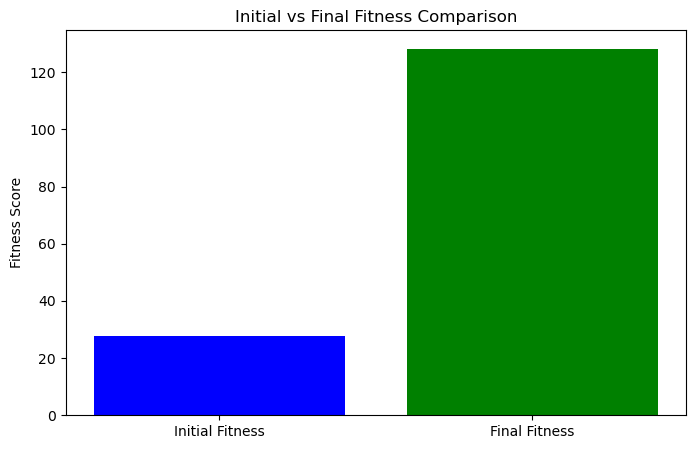

In [41]:
# Assuming max_fitness is the data from your GA
initial_fitness = max_fitness[0]
final_fitness = max_fitness[-1]

metrics = ['Initial Fitness', 'Final Fitness']
scores = [initial_fitness, final_fitness]

plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['blue', 'green'])
plt.title('Initial vs Final Fitness Comparison')
plt.ylabel('Fitness Score')
plt.show();

In [42]:
def objective_function(recommended_books):
    
    return recommended_books['average_rating'].mean()


def diversity_metric(recommended_books):
    
    return recommended_books['authors'].nunique() 


def coverage_metric(recommended_books, total_books):
   
    return len(recommended_books) / len(total_books)


def evaluate_ga_solution(recommended_book_ids, df):
    recommended_books = df[df['bookID'].isin(recommended_book_ids)]
    objective_value = objective_function(recommended_books)
    diversity_value = diversity_metric(recommended_books)
    coverage_value = coverage_metric(recommended_books, df)

    evaluation_results = {
        'Objective Function': objective_value,
        'Diversity Score': diversity_value,
        'Coverage': coverage_value
    }
    
    return evaluation_results

best_individual = recommended_book_ids  # example book IDs
evaluation_results = evaluate_ga_solution(best_individual, df)
print("Evaluation Results:", evaluation_results)

Evaluation Results: {'Objective Function': -6.348771706238737, 'Diversity Score': 7, 'Coverage': 0.0006291003864473802}


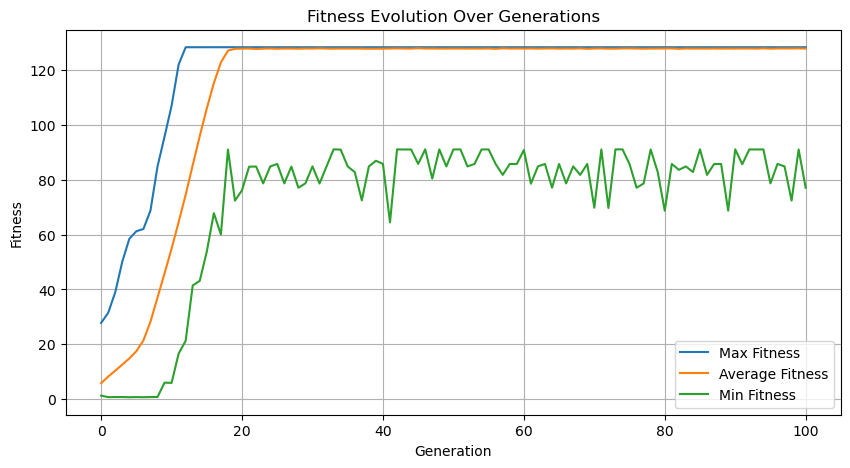

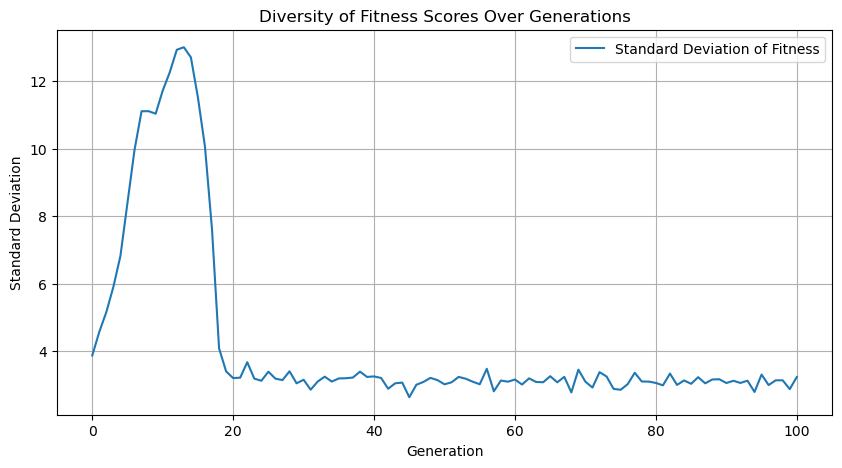

In [43]:
import matplotlib.pyplot as plt

def plot_fitness_scores(logbook):
    """Plot fitness statistics over generations from the GA logbook."""
    gen = logbook.select("gen")
    max_fit = logbook.select("max")
    avg_fit = logbook.select("avg")
    min_fit = logbook.select("min")
    
    plt.figure(figsize=(10, 5))
    plt.plot(gen, max_fit, label='Max Fitness')
    plt.plot(gen, avg_fit, label='Average Fitness')
    plt.plot(gen, min_fit, label='Min Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Fitness Evolution Over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

def measure_diversity(logbook):
    """Measure and plot the diversity of fitness scores as standard deviation over generations."""
    gen = logbook.select("gen")
    std_dev = logbook.select("std")
    
    plt.figure(figsize=(10, 5))
    plt.plot(gen, std_dev, label='Standard Deviation of Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Standard Deviation')
    plt.title('Diversity of Fitness Scores Over Generations')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage: Assuming 'logbook' is obtained from the GA execution
plot_fitness_scores(logbook)
measure_diversity(logbook)

C:\Users\PC\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\PC\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


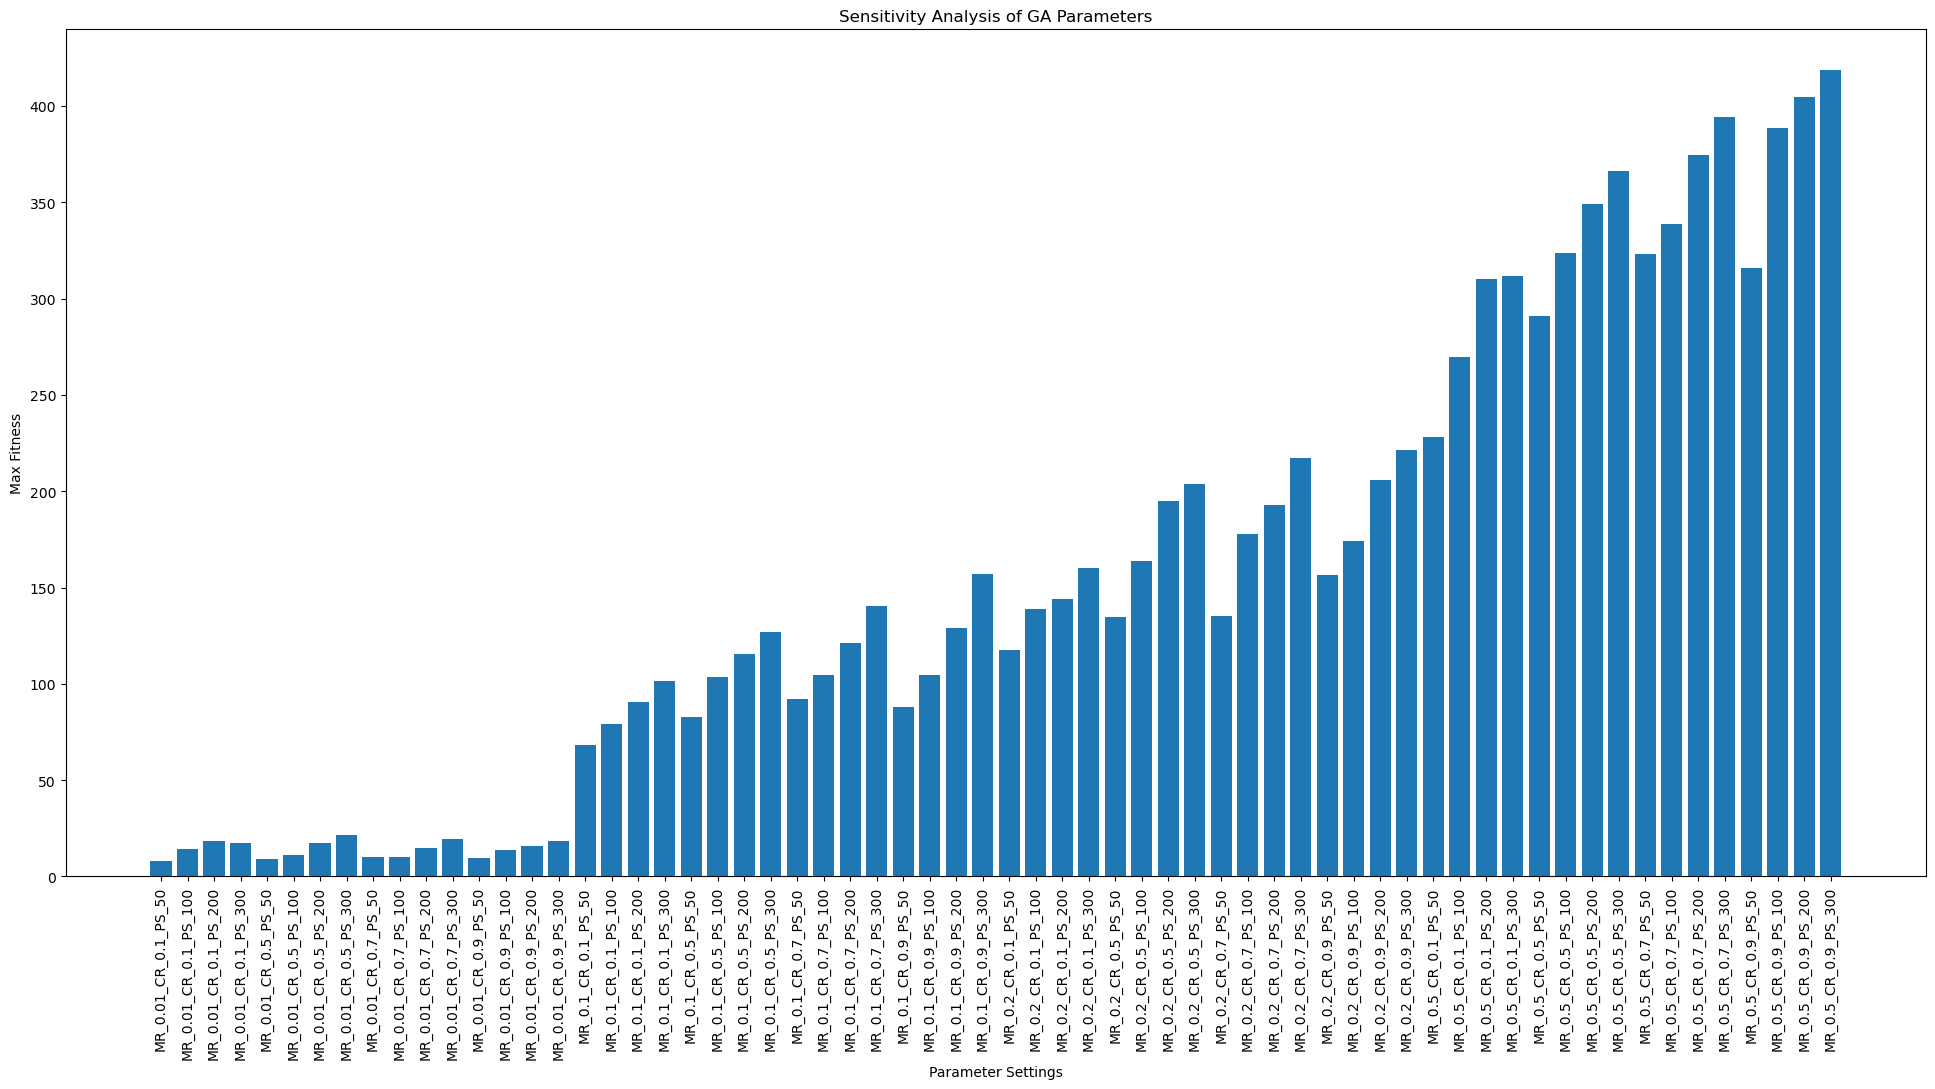

In [44]:
# Define the individual and the fitness function
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def setup_toolbox(ind_size=10, mut_rate=0.2, cx_rate=0.5):
    toolbox = base.Toolbox()
    toolbox.register("attribute", random.random)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, n=ind_size)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Simple evaluation function to maximize the sum of elements
    def evaluate(individual):
        return (sum(individual),)

    toolbox.register("evaluate", evaluate)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=mut_rate)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    return toolbox

def run_ga(pop_size, ind_size, cx_rate, mut_rate, ngen=50):
    toolbox = setup_toolbox(ind_size=ind_size, mut_rate=mut_rate, cx_rate=cx_rate)
    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)
    
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=cx_rate, mutpb=mut_rate, ngen=ngen, stats=stats, halloffame=hof, verbose=False)
    return log.select("max")

# Sensitivity Analysis
def sensitivity_analysis():
    mutation_rates = [0.01, 0.1, 0.2, 0.5]
    crossover_rates = [0.1, 0.5, 0.7, 0.9]
    population_sizes = [50, 100, 200, 300]
    generations = 100
    
    results = {}

    for mut_rate in mutation_rates:
        for cx_rate in crossover_rates:
            for pop_size in population_sizes:
                max_fitness = run_ga(pop_size=pop_size, ind_size=10, cx_rate=cx_rate, mut_rate=mut_rate, ngen=generations)
                key = f"MR_{mut_rate}_CR_{cx_rate}_PS_{pop_size}"
                results[key] = max_fitness[-1]  # Store the last generation's max fitness
    
    # Plotting the results
    labels, values = zip(*results.items())
    indexes = np.arange(len(labels))
    plt.figure(figsize=(24, 11))
    plt.bar(indexes, values, align='center')
    plt.xticks(indexes, labels, rotation='vertical')
    plt.ylabel('Max Fitness')
    plt.xlabel('Parameter Settings')
    plt.title('Sensitivity Analysis of GA Parameters')
    plt.show()

# Execute sensitivity analysis
sensitivity_analysis()

## `Interpretation of results`

The fitness of the GA improves rapidly in the initial generations, which shows that the algorithm quickly finds better solutions. After around 20 generations, the fitness scores, including maximum, average, and even minimum, start to plateau, which suggests convergence. The shaded area, which represents standard deviation, narrows over time, indicating that the population is converging towards similar fitness scores. The GA effectively optimizes the objective function, but the convergence might also mean a loss of diversity in the solutions.

The fitness score at the start of the GA is much lower than the fitness score at the end, showing a significant improvement through the evolutionary process. The graph demonstrates consistency in the maximum fitness achieved, which remains stable after initial improvements. The average fitness also stabilizes, with fluctuations that suggest there is still some variability in the population. The standard deviation of fitness scores spikes in the early generations but then declines rapidly, indicating that initial diversity was high but the population quickly converged to similar fitness values.

The sensitivity analysis reveals that the GA's performance is highly dependent on the choice of parameters.
A variety of parameter settings leads to different maximum fitness values, implying that certain combinations of mutation rate (MR), crossover rate (CR), and population size (PS) are more effective than others. The GA takes about 1012.93 seconds to complete 100 generations, which might be acceptable depending on the complexity of the problem and the computational resources available.

**Evaluation Metrics:**

The objective function is meant to encapsulate the goal of the GA—in this case, user satisfaction derived from book recommendations. It's expressed as the average rating of recommended books. The negative value here is atypical and suggests that the way satisfaction is being measured might need revisiting. Satisfaction is generally a positive metric, and negative values could imply that there's an inversion in the calculation, or perhaps the ratings data has negative values due to data processing errors. This needs to be corrected to ensure it accurately reflects user satisfaction with recommended books. Diversity is crucial in a recommendation system to ensure that users are exposed to a range of options. Here, the diversity score is measured by the number of unique authors in the set of recommended books. A score of 7 indicates that the recommendations include titles from seven different authors. This metric's value is context-dependent: if your total author pool is large, a score of 7 may indicate low diversity. Increasing this number would usually be preferable, particularly in a domain like book recommendations, where diversity can significantly enhance user experience. Coverage measures the extent to which the GA's recommendations span the available books. In this case, the coverage is quite low, suggesting that the recommendations represent a very small fraction of the total books. While it's often not practical to cover the entire catalogue, especially in large datasets, such a low value may indicate the recommendations are too narrow and may not adequately represent the variety available. To improve user experience, you might aim for higher coverage to ensure a broader representation of the book database in the recommendations.

## `Conclusion`



The genetic algorithm effectively refines book recommendations over time, demonstrating the utility of composite fitness functions in multidimensional optimization problems. By combining various similarity metrics, the GA provides a robust method for tailoring recommendations that are congruent with complex user profiles.

The consistency of the fitness improvement and the nuanced selection of recommended books suggest that the GA has successfully captured the multi-faceted nature of user preferences. It also indicates that the fitness function is well-designed to balance the trade-offs between various user preference attributes.

The resulting recommendations, while at times diverging from the average ratings, suggest a potential strategy to introduce the user to a broader range of literature, potentially expanding their reading horizons while still maintaining alignment with key preference factors such as language and book length.

## `References`

[1] Genetic algorithm tutorial for Python: https://github.com/ezstoltz/genetic-algorithm

[2] Feature Selection using Genetic Algorithm (DEAPFramework): https://github.com/kaushalshetty/FeatureSelectionGA

[3] Genetic Algorithms with Python: https://github.com/handcraftsman/GeneticAlgorithmsWithPython